In [4]:
%cd /content/drive/MyDrive/Soumaya X/airlines_performance

/content/drive/MyDrive/Soumaya X/airlines_performance


<a href="https://colab.research.google.com/github/alexZajac/airlines_performance/blob/master/Starting_kit_twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM starting kit with sentiment analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
pd.options.mode.chained_assignment = None  # default='warn'

In [6]:
!gdown "https://drive.google.com/uc?id=1s8NHRN_wAEhCCQXJw9hdvweiUARi0b_t"

Downloading...
From: https://drive.google.com/uc?id=1s8NHRN_wAEhCCQXJw9hdvweiUARi0b_t
To: /content/drive/MyDrive/Soumaya X/airlines_performance/tweets_NLP_dataset_clean.csv
27.8MB [00:00, 76.3MB/s]


In [7]:
!gdown "https://drive.google.com/uc?id=1ADe4UbTRDdiJHrW-Og6E5UhTtdMvBnnL"

Downloading...
From: https://drive.google.com/uc?id=1ADe4UbTRDdiJHrW-Og6E5UhTtdMvBnnL
To: /content/drive/My Drive/Soumaya X/airlines_performance/featured_dataset_final_2013_2019_10_01.csv
100% 1.72M/1.72M [00:00<00:00, 79.4MB/s]


In [8]:
!pip install ipython-autotime

In [9]:
%load_ext autotime

time: 120 µs (started: 2021-01-14 16:34:16 +00:00)


In [10]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          'axes.labelsize' : 15,
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
          "axes.titlecolor": "w", 
          'figure.figsize': [20, 8], 
          'axes.prop_cycle': plt.cycler(color=color_list), 
          'figure.dpi' : 75, 
          'legend.fontsize': 10,
          'font.size': 15 
          }
plt.rcParams.update(params)

time: 13.2 ms (started: 2021-01-14 16:34:16 +00:00)


In [11]:
df_tweets_nlp = pd.read_csv("tweets_NLP_dataset_clean.csv", index_col=0)
df_tweets_nlp['DATE'] = pd.to_datetime(df_tweets_nlp['DATE'])
df_tweets_nlp = df_tweets_nlp.groupby(['UNIQUE_CARRIER_NAME','DATE'])['NEGATIVE','NEUTRAL','POSITIVE'].mean().reset_index(drop=False)
df_featured = pd.read_csv("featured_dataset_final_2013_2019_10_01.csv", index_col=0)
df_featured['DATE'] = pd.to_datetime(df_featured['DATE'])
load_tweet = df_featured.merge(df_tweets_nlp, left_on=['DATE','UNIQUE_CARRIER_NAME'], right_on = ['DATE','UNIQUE_CARRIER_NAME'])
load_tweet.set_index('DATE', inplace=True)
a = load_tweet['LOAD_FACTOR']
del load_tweet['LOAD_FACTOR']
load_tweet['LOAD_FACTOR'] = a
load_tweet.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,UNIQUE_CARRIER_NAME,194,26,339,35,359,406,416,461,482,530,608,612,614,616,617,619,622,623,624,625,626,627,629,631,634,637,638,644,650,654,655,656,673,674,675,676,677,678,687,...,TOP1_PRCP,TOP1_SNOW,TOP1_TAVG,TOP1_TMAX,TOP1_TSUN,TOP1_WSPD,TOP2_DEST,TOP2_PRCP,TOP2_SNOW,TOP2_TAVG,TOP2_TMAX,TOP2_TSUN,TOP2_WSPD,TOP3_DEST,TOP3_PRCP,TOP3_SNOW,TOP3_TAVG,TOP3_TMAX,TOP3_TSUN,TOP3_WSPD,TOP4_DEST,TOP4_PRCP,TOP4_SNOW,TOP4_TAVG,TOP4_TMAX,TOP4_TSUN,TOP4_WSPD,TOP5_DEST,TOP5_PRCP,TOP5_SNOW,TOP5_TAVG,TOP5_TMAX,TOP5_TSUN,TOP5_WSPD,TOP_1_DEST_FQ,UNEMPLOYMENT,NEGATIVE,NEUTRAL,POSITIVE,LOAD_FACTOR
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,Air Wisconsin Airlines Corp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,1.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,150.7,0.0,24.723333,34.4,0.0,10.083333,"Philadelphia, PA",83.1,6.428571,2.657143,19.4,0.0,15.271429,"Washington, DC",126.3,0.0,21.138710,33.9,0.0,13.696774,"Boston, MA",100.0,0.000000,20.596667,35.6,0.0,14.920000,"Scranton/Wilkes-Barre, PA",76.1,0.000000,19.480000,33.3,0.0,9.056667,0.155556,7.8%,0.062290,0.717835,0.219875,0.694164
2013-01-01,Alaska Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.167,0.356,0.0,0.333,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.144,0.0,0.0,0.0,0.00,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,97.3,0.0,7.019355,16.1,0.0,12.438710,"Anchorage, AK",20.9,465.483871,-2.345161,5.6,0.0,8.900000,"Portland, OR",114.1,0.0,7.543333,17.8,0.0,11.816667,"Juneau, AK",256.4,0.000000,7.148387,13.3,0.0,12.970968,"Palm Springs, CA",0.0,0.000000,18.861290,34.4,0.0,6.703333,0.247748,7.8%,0.146592,0.707646,0.145762,0.829975
2013-01-01,Allegiant Air,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.048,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.012,0.940,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,57.4,0.0,20.403333,32.8,0.0,13.340000,"Sanford, FL",96.7,0.000000,15.009677,28.3,0.0,12.758065,"Phoenix, AZ",7.8,0.0,13.846429,26.7,0.0,8.528571,"Wendover, UT",26.9,0.000000,3.453333,16.7,0.0,9.610000,"St. Petersburg, FL",228.3,0.000000,28.564516,34.4,0.0,8.448387,0.097510,7.8%,0.102234,0.686688,0.211078,0.868898
2013-01-01,American Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.335,0.0,0.000,0.0,0.173,0.000,0.000,0.041,0.059,0.027,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.000,0.364,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,...,88.6,0.0,10.266667,28.3,0.0,16.222581,"Chicago, IL",45.3,0.000000,13.587097,26.7,0.0,18.080645,"Miami, FL",322.9,0.0,27.774194,34.4,13909.0,12.438710,"Los Angeles, CA",6.1,0.000000,20.619355,35.0,0.0,9.480645,"New York, NY",128.8,21.935484,4.290323,22.8,0.0,20.238710,0.198728,7.8%,0.156207,0.578079,0.265715,0.801683
2013-01-01,Delta Air Lines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026,0.120,0.0,0.000,0.0,0.115,0.025,0.005,0.000,0.035,0.005,0.0,0.0,0.000,0.0,0.0,0.0,0.04,0.000,0.141,0.073,0.0,0.0,0.0,0.0,0.0,0.0,0.016,...,149.7,0.0,17.023333,28.9,0.0,14.503333,"Minneapolis, MN",76.1,0.000000,19.938710,37.8,0.0,13.245161,"Detroit, MI",72.1,0.0,13.983871,29.4,0.0,14.616129,"Salt Lake City, UT",27.1,41.071429,4.014286,16.7,0.0,13.575000,"New York, NY",128.8,21.935484,4.290323,22.8,0.0,20.238710,0.183770,7.8%,0.105832,0.404361,0.489807,0.804674


time: 837 ms (started: 2021-01-14 16:34:16 +00:00)


In [12]:
def label_encoding(data):
  le = LabelEncoder()
  for column_name in data.columns:
      if data[column_name].dtype == object:
          data[column_name] = le.fit_transform(data[column_name])
      else:
          pass
  return data

time: 4.15 ms (started: 2021-01-14 16:34:17 +00:00)


In [13]:
win_length = 2
batch_size = 2
num_features = 131

time: 1.41 ms (started: 2021-01-14 16:34:17 +00:00)


In [14]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(win_length, num_features)))
model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
model2.add(tf.keras.layers.LSTM(256, return_sequences=True))
model2.add(tf.keras.layers.LSTM(128, return_sequences=True))
model2.add(tf.keras.layers.LSTM(64, return_sequences=True))
model2.add(tf.keras.layers.LSTM(num_features, return_sequences=False)) 
model2.add(tf.keras.layers.Dense(1))

model2.compile(loss=tf.losses.MeanAbsoluteError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])

time: 1.87 s (started: 2021-01-14 16:34:17 +00:00)


In [15]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 64)             50176     
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 128)            98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 2, 256)            394240    
_________________________________________________________________
lstm_3 (LSTM)                (None, 2, 128)            197120    
_________________________________________________________________
lstm_4 (LSTM)                (None, 2, 64)             49408     
_________________________________________________________________
lstm_5 (LSTM)                (None, 131)               102704    
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [16]:
def LSTM_forecast(dataframe_collection, win_length, batch_size, num_features, model_LSTM):
  predictions = {}
  for dataframe in dataframe_collection:
    print('Predicting the carrier ' + dataframe + '....')
    df = dataframe_collection[dataframe].copy()
    df = label_encoding(df)
    df.pop('UNIQUE_CARRIER_NAME')
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df)
    features = data_scaled
    target = data_scaled[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state = 12, shuffle = False)
    train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
    test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)
    model_LSTM.fit(train_generator, epochs = 50 , validation_data=test_generator, shuffle=False, verbose = 0)
    predictions_tmp = model_LSTM.predict(test_generator)
    df_pred = pd.concat([pd.DataFrame(x_test[:,:-1][win_length:]), pd.DataFrame(predictions_tmp)], axis=1)
    df_pred.columns = range(len(df_pred.columns))
    rev_trans = scaler.inverse_transform(df_pred)
    df_final = df[predictions_tmp.shape[0]*-1:]
    df_final['PRED'] = rev_trans[:, -1]
    tmp = df_final[['LOAD_FACTOR', 'PRED']]
    predictions[dataframe] = tmp
    print('METRIC TEMPORAIRE :' + str(mean_absolute_error(df_final['PRED'], df_final['LOAD_FACTOR'])))
    plt.plot(df_final.index, df_final['LOAD_FACTOR'], label='True Load Factor')
    plt.plot(df_final.index, df_final['PRED'], label='Predicted Load Factor')
    plt.title('Predictions for the carrier : ' + dataframe)
    plt.show()
  return predictions

time: 28.6 ms (started: 2021-01-14 16:34:18 +00:00)


In [17]:
carriers = np.unique(load_tweet['UNIQUE_CARRIER_NAME'])
dataframe_collection = {} 
for carrier in carriers:
  if carrier != 'US Airways Inc.':
    dataframe_collection[carrier] = load_tweet[load_tweet['UNIQUE_CARRIER_NAME'] == carrier]
dataframe_collection['SkyWest Airlines Inc.'].head()

,UNIQUE_CARRIER_NAME,194,26,339,35,359,406,416,461,482,530,608,612,614,616,617,619,622,623,624,625,626,627,629,631,634,637,638,644,650,654,655,656,673,674,675,676,677,678,687,...,TOP1_PRCP,TOP1_SNOW,TOP1_TAVG,TOP1_TMAX,TOP1_TSUN,TOP1_WSPD,TOP2_DEST,TOP2_PRCP,TOP2_SNOW,TOP2_TAVG,TOP2_TMAX,TOP2_TSUN,TOP2_WSPD,TOP3_DEST,TOP3_PRCP,TOP3_SNOW,TOP3_TAVG,TOP3_TMAX,TOP3_TSUN,TOP3_WSPD,TOP4_DEST,TOP4_PRCP,TOP4_SNOW,TOP4_TAVG,TOP4_TMAX,TOP4_TSUN,TOP4_WSPD,TOP5_DEST,TOP5_PRCP,TOP5_SNOW,TOP5_TAVG,TOP5_TMAX,TOP5_TSUN,TOP5_WSPD,TOP_1_DEST_FQ,UNEMPLOYMENT,NEGATIVE,NEUTRAL,POSITIVE,LOAD_FACTOR
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,SkyWest Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.437,0.351,0.0,0.0,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.1,41.071429,4.014286,16.7,0.0,13.575000,"Denver, CO",128.2,0.0,26.951613,33.2,0.0,0.0,"Chicago, IL",45.3,0.000000,13.587097,26.7,0.0,18.080645,"Minneapolis, MN",76.1,0.0,19.938710,37.8,0.0,13.245161,"Los Angeles, CA",6.1,0.0,20.619355,35.0,0.0,9.480645,0.095722,7.8%,0.121226,0.584692,0.294082,0.784116
2013-02-01,SkyWest Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444,0.356,0.0,0.0,0.120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.8,18.709677,7.761290,22.8,0.0,13.658065,"Denver, CO",0.0,0.0,26.800000,30.3,0.0,0.0,"Chicago, IL",123.9,13.533333,8.486667,23.3,0.0,18.226667,"Los Angeles, CA",10.7,0.0,18.073333,31.1,0.0,9.416667,"Minneapolis, MN",96.1,0.0,22.786667,37.2,0.0,15.270000,0.091533,7.9%,0.083556,0.742766,0.173678,0.805831
2013-03-01,SkyWest Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.467,0.320,0.0,0.0,0.117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.6,0.000000,13.060000,30.6,0.0,14.360000,"Denver, CO",0.0,0.0,29.250000,34.9,0.0,0.0,"Los Angeles, CA",102.5,0.000000,14.609677,26.1,0.0,9.087097,"San Francisco, CA",186.6,0.0,12.664286,18.3,0.0,15.150000,"Minneapolis, MN",112.7,0.0,23.861290,35.0,0.0,12.758065,0.103614,7.7%,0.094069,0.678459,0.227472,0.826178
2013-04-01,SkyWest Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.447,0.360,0.0,0.0,0.115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.1,0.000000,17.845161,32.2,0.0,12.687097,"Denver, CO",70.8,0.0,28.244444,34.2,0.0,0.0,"Chicago, IL",25.3,19.580645,-2.600000,9.4,0.0,17.019355,"San Francisco, CA",68.4,0.0,14.053333,25.6,0.0,13.648387,"Houston, TX",9.7,0.0,29.283871,36.7,0.0,13.341935,0.094044,7.6%,0.113526,0.693496,0.192978,0.818458
2013-05-01,SkyWest Airlines Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.448,0.343,0.0,0.0,0.129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.3,0.000000,24.236667,36.1,0.0,15.500000,"Denver, CO",234.4,0.0,27.764516,34.4,0.0,0.0,"Chicago, IL",33.5,8.724138,0.255172,18.3,0.0,18.686207,"Houston, TX",180.5,0.0,29.690323,37.8,0.0,10.487097,"Minneapolis, MN",174.7,0.0,18.436667,33.3,0.0,14.100000,0.098131,7.5%,0.026368,0.655444,0.318188,0.836107


time: 157 ms (started: 2021-01-14 16:34:18 +00:00)


Predicting the carrier Air Wisconsin Airlines Corp....
METRIC TEMPORAIRE :0.02898125992115738


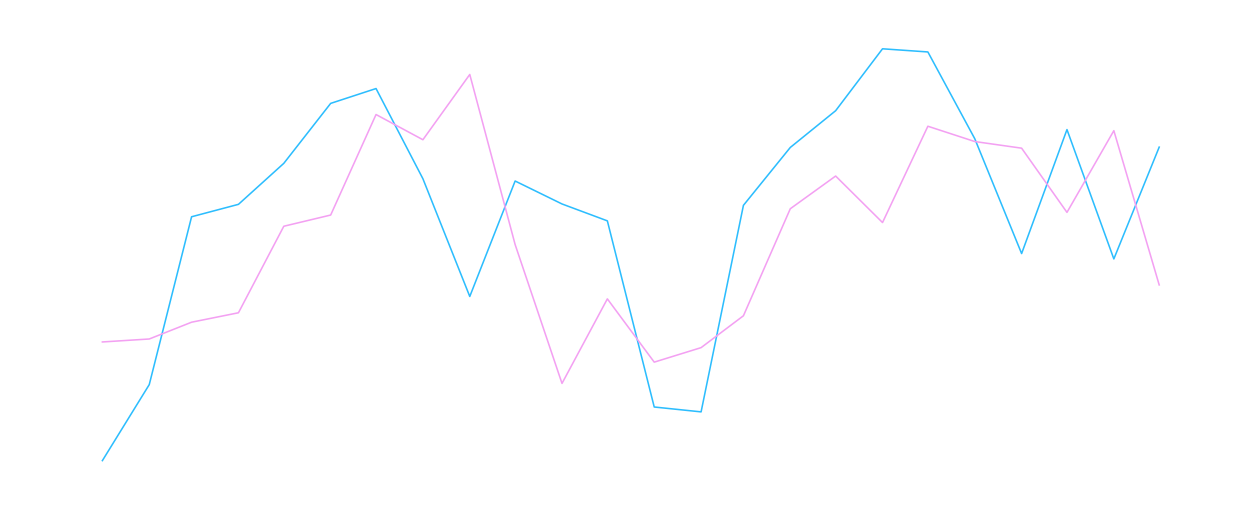

Predicting the carrier Alaska Airlines Inc.....
METRIC TEMPORAIRE :0.03757787813539729


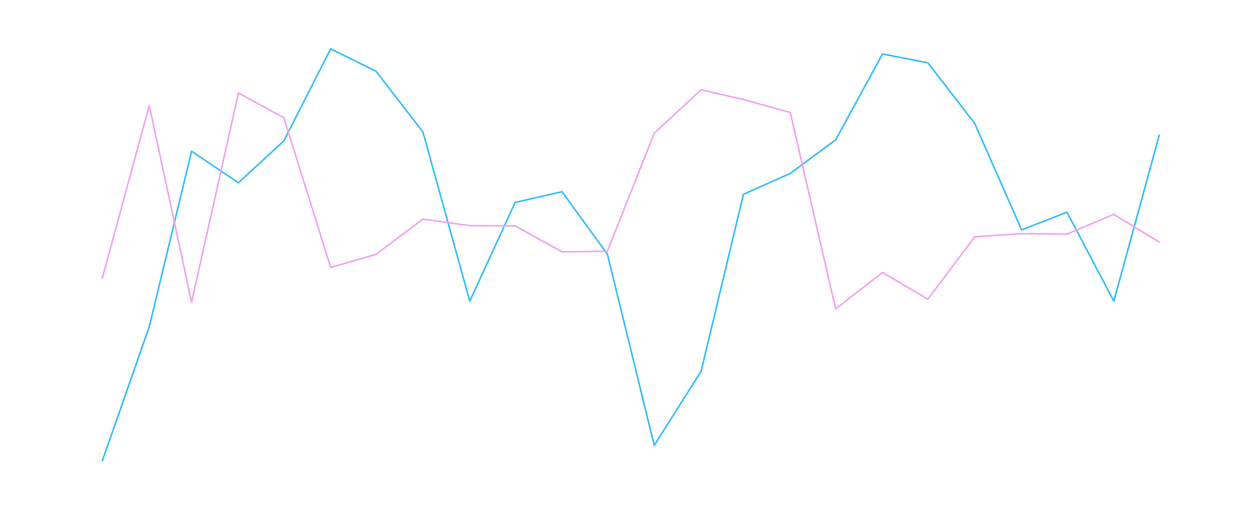

Predicting the carrier Allegiant Air....
METRIC TEMPORAIRE :0.02372089982693953


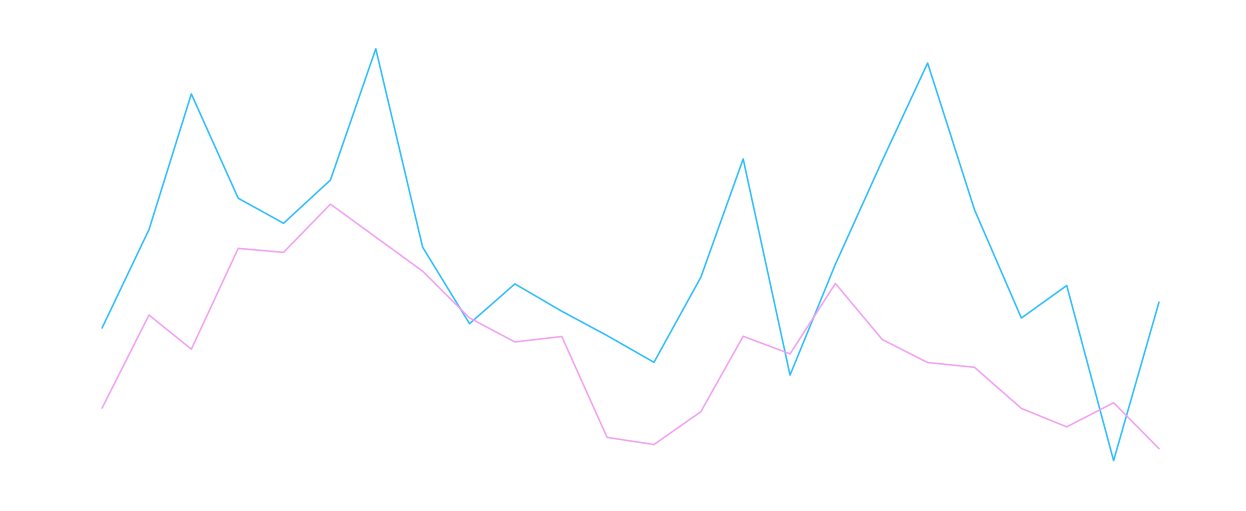

Predicting the carrier American Airlines Inc.....
METRIC TEMPORAIRE :0.035775649982933276


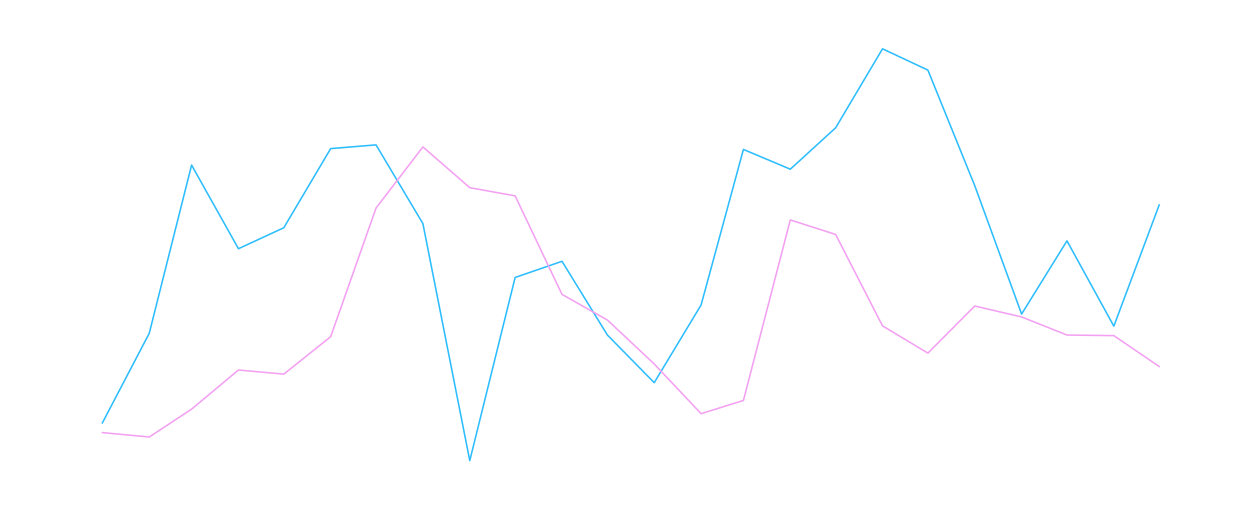

Predicting the carrier Delta Air Lines Inc.....
METRIC TEMPORAIRE :0.017913225949782716


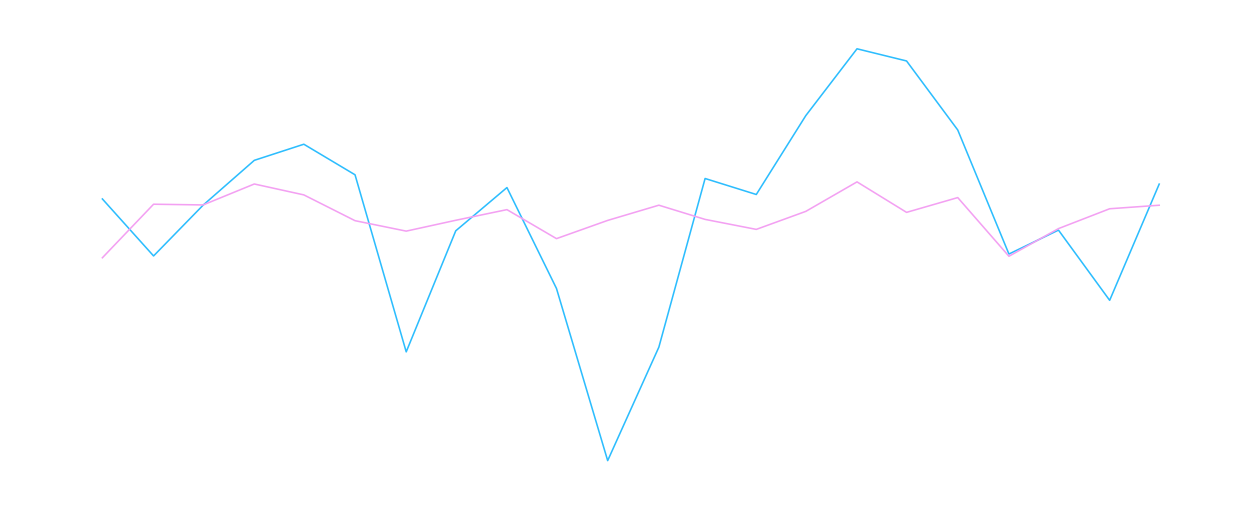

Predicting the carrier Endeavor Air Inc.....


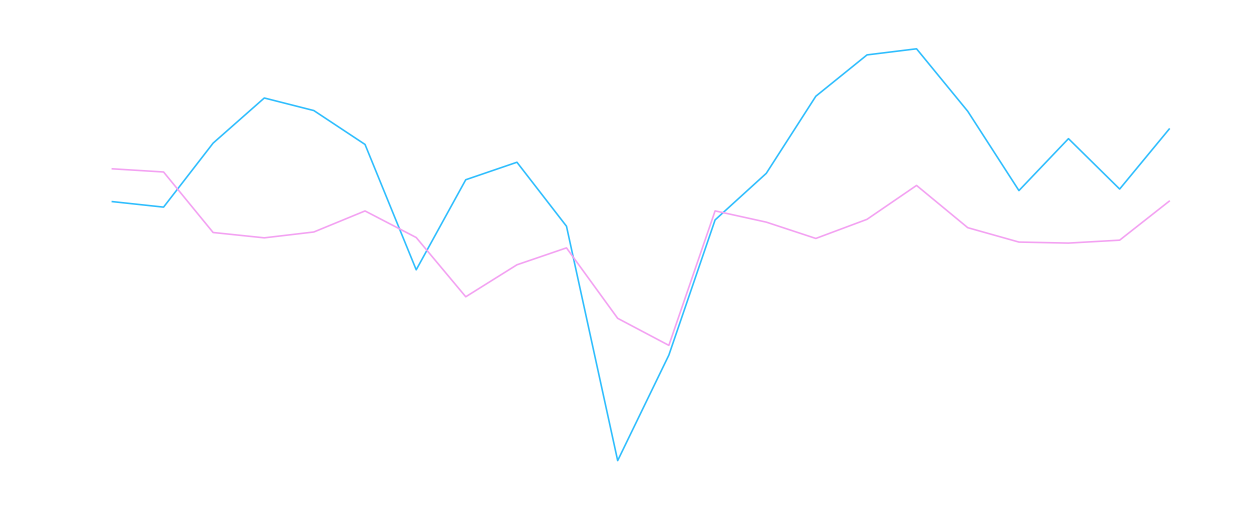

Predicting the carrier Envoy Air....
METRIC TEMPORAIRE :0.02219635431781126


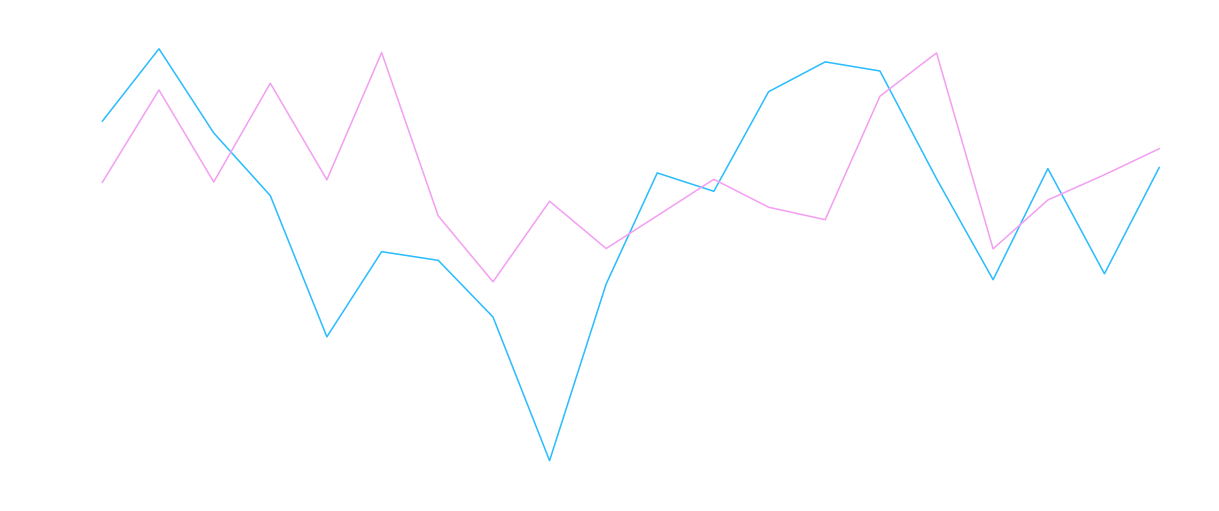

Predicting the carrier ExpressJet Airlines LLC....
METRIC TEMPORAIRE :0.029693980709826484


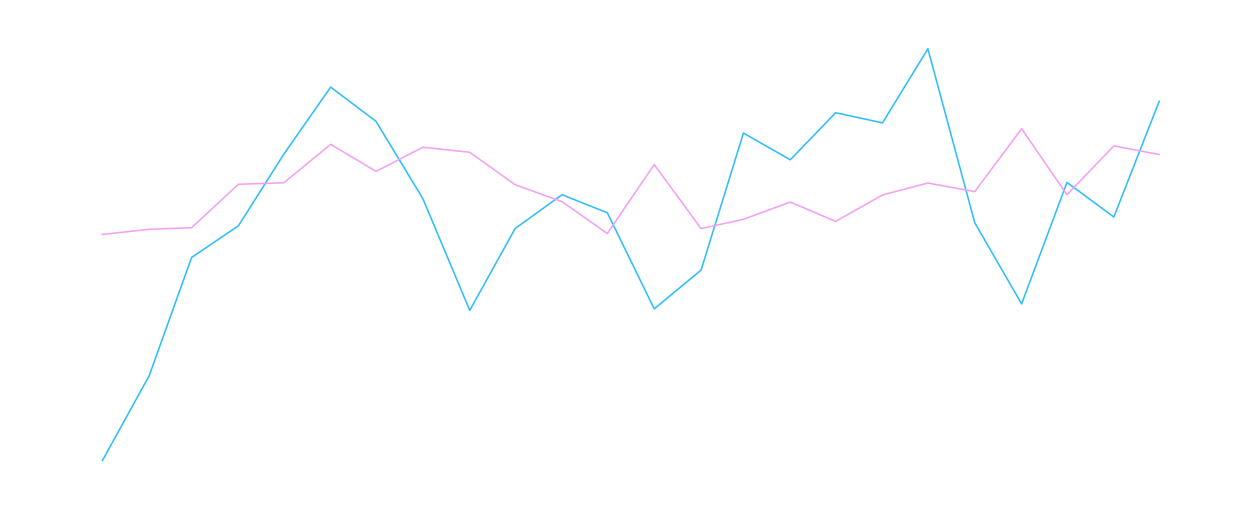

Predicting the carrier Frontier Airlines Inc.....
METRIC TEMPORAIRE :0.023069149920407456


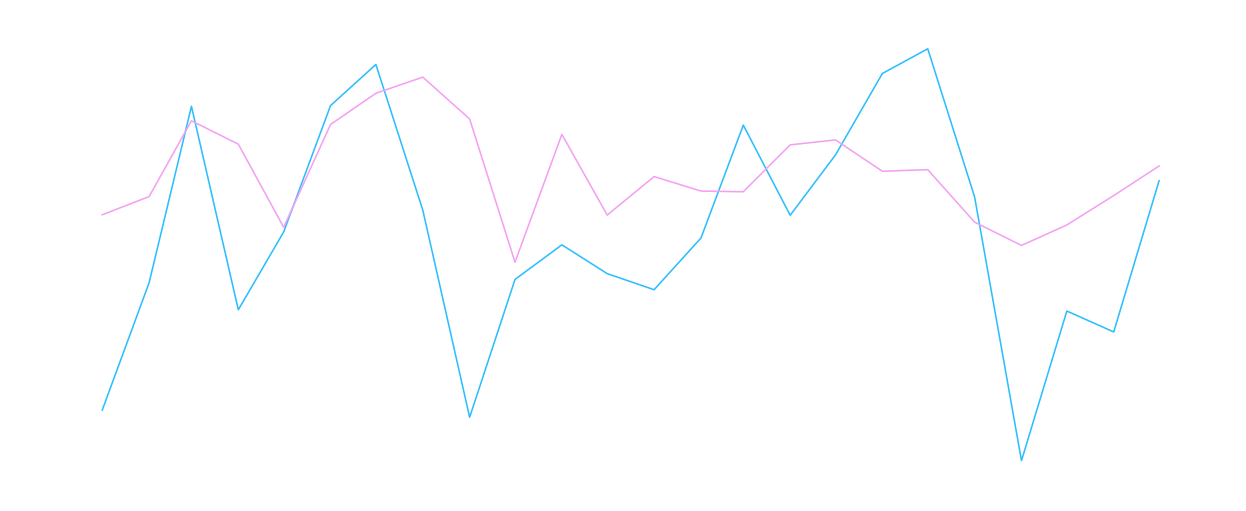

Predicting the carrier GoJet Airlines LLC d/b/a United Express....
METRIC TEMPORAIRE :0.028960916733475044


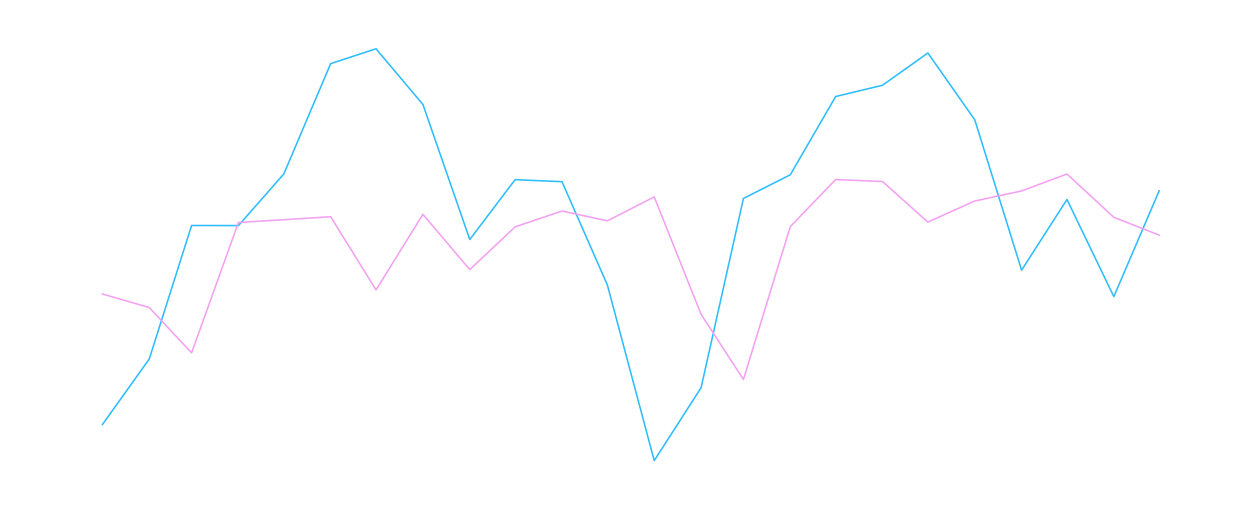

Predicting the carrier Grant Aviation....
METRIC TEMPORAIRE :0.04125589700158937


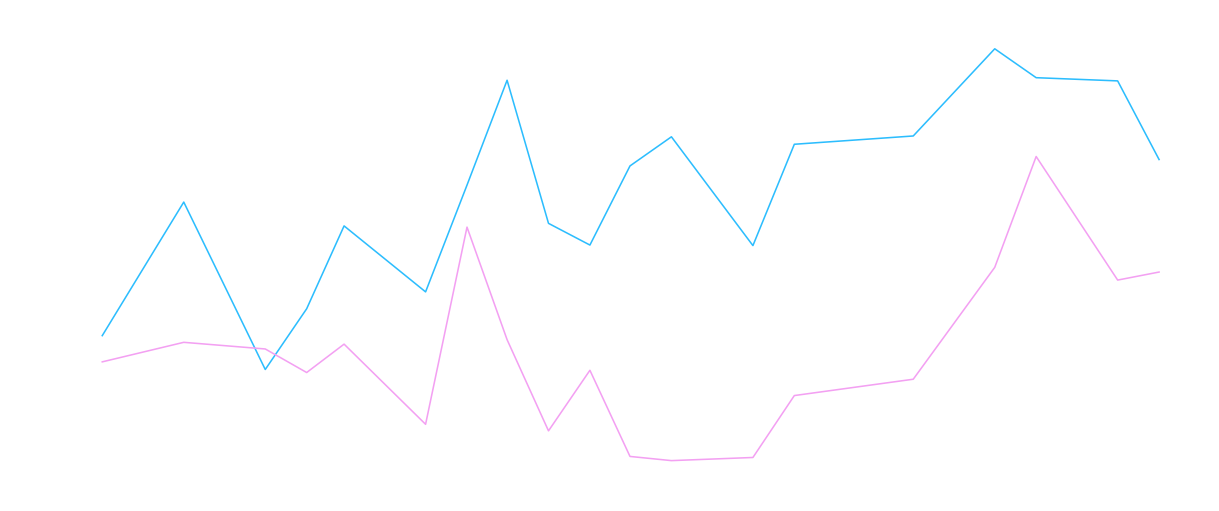

Predicting the carrier JetBlue Airways....
METRIC TEMPORAIRE :0.02379955537680948


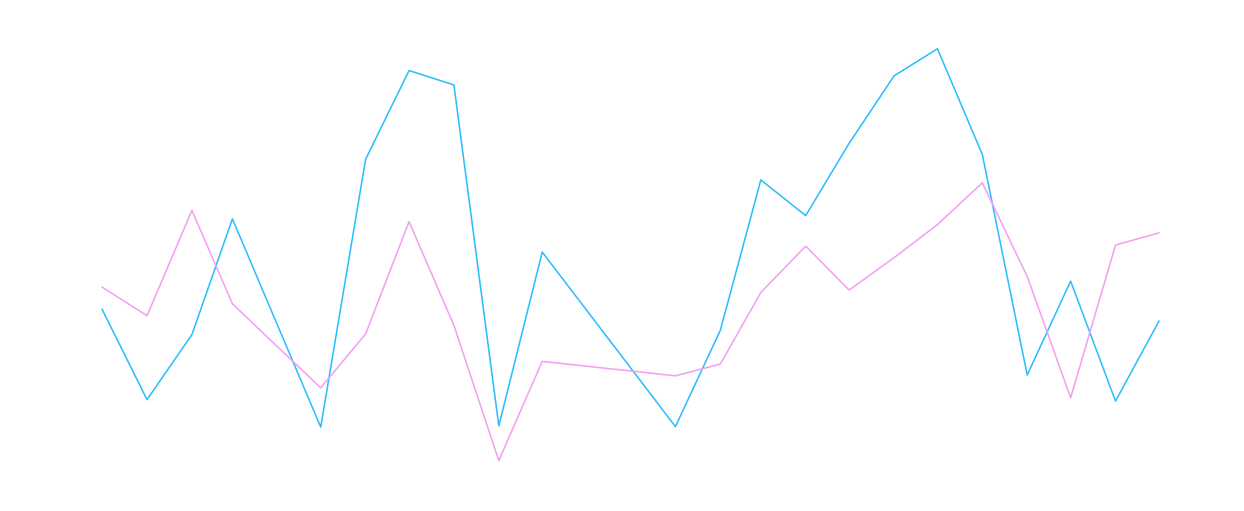

Predicting the carrier Mesa Airlines Inc.....
METRIC TEMPORAIRE :0.02132240838389007


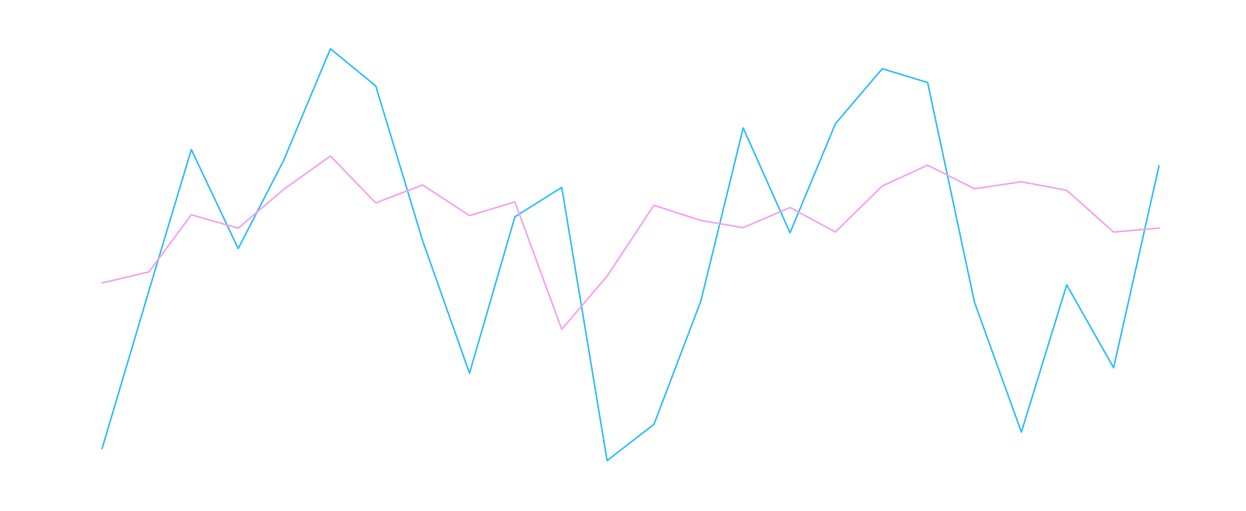

Predicting the carrier PSA Airlines Inc.....
METRIC TEMPORAIRE :0.022666471738993013


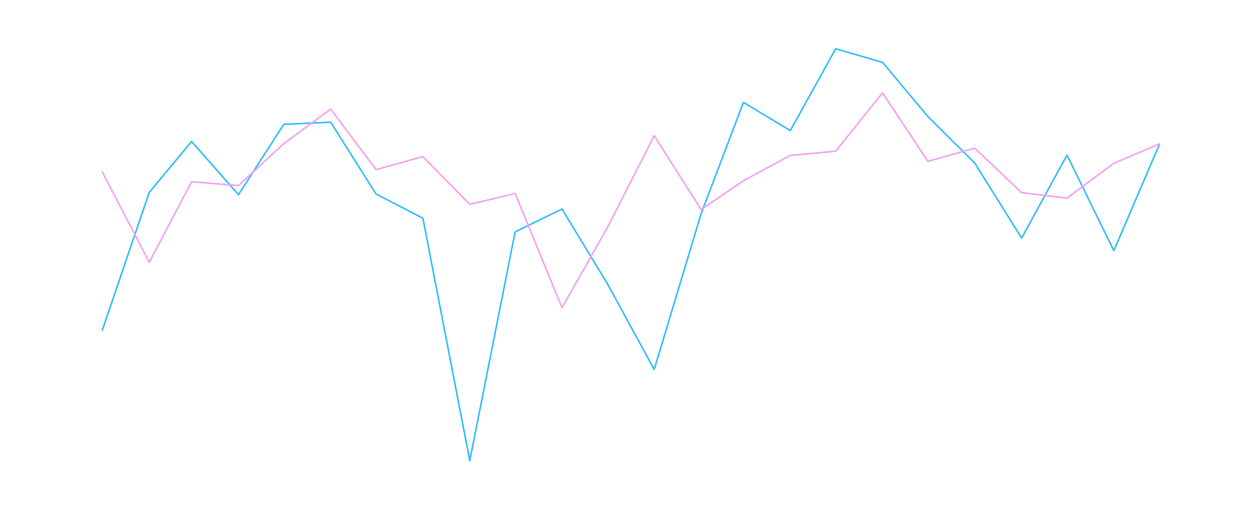

Predicting the carrier Republic Airline....
METRIC TEMPORAIRE :0.03997943292453585


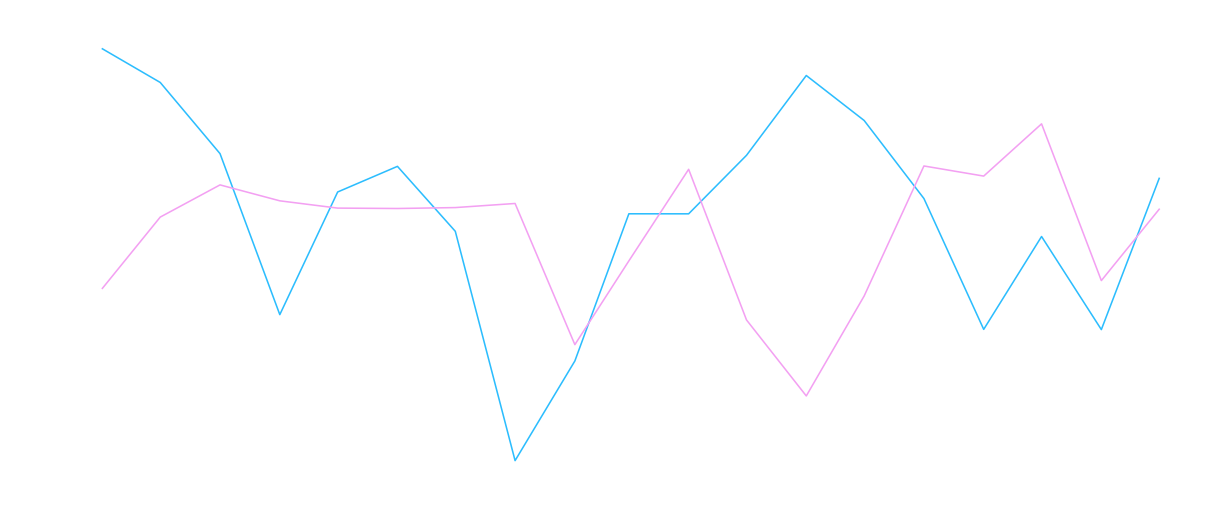

Predicting the carrier Shuttle America Corp.....
METRIC TEMPORAIRE :0.06000631627990901


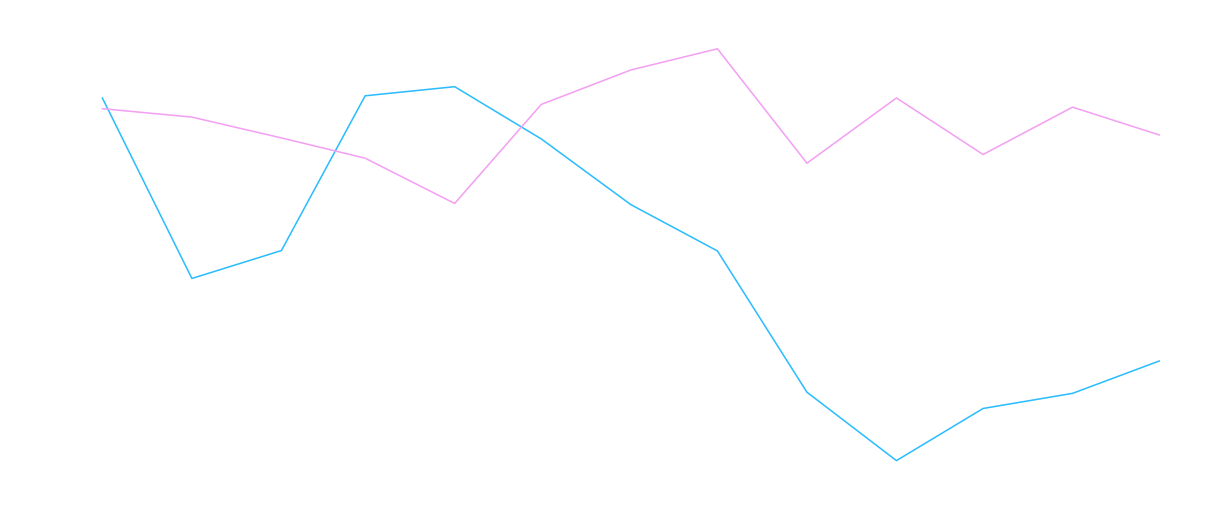

Predicting the carrier SkyWest Airlines Inc.....
METRIC TEMPORAIRE :0.022857157633032456


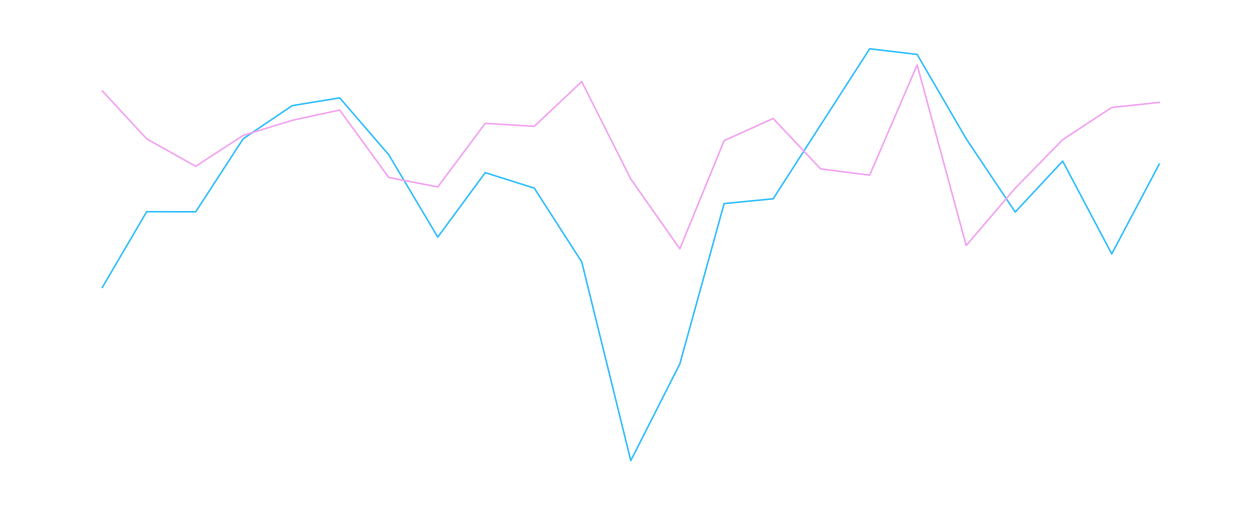

Predicting the carrier Southwest Airlines Co.....
METRIC TEMPORAIRE :0.025144110801127897


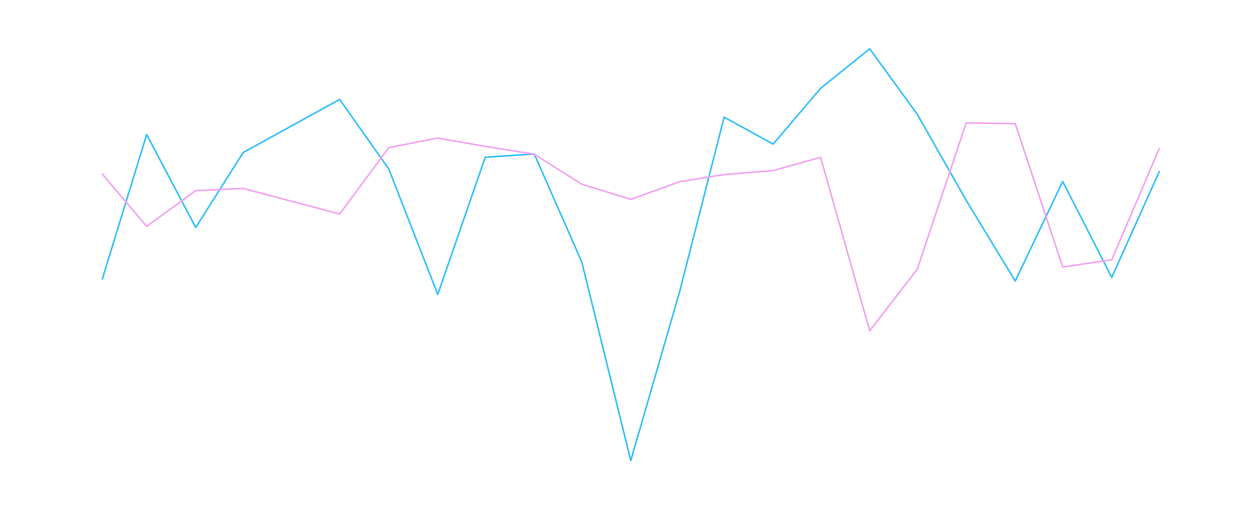

Predicting the carrier Spirit Air Lines....
METRIC TEMPORAIRE :0.036415284940520466


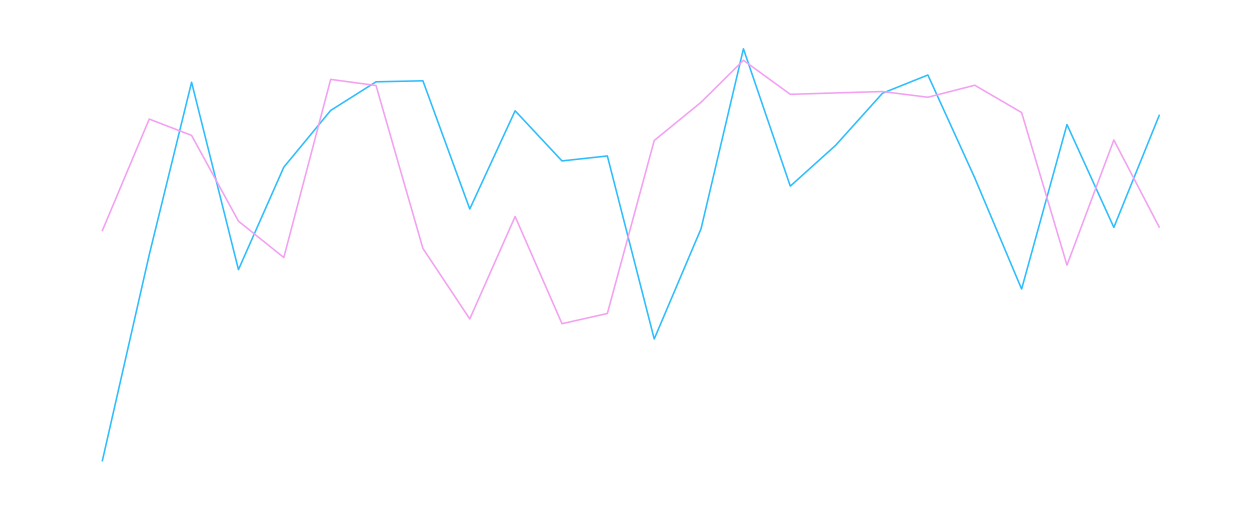

Predicting the carrier Sun Country Airlines d/b/a MN Airlines....
METRIC TEMPORAIRE :0.053722007728185146


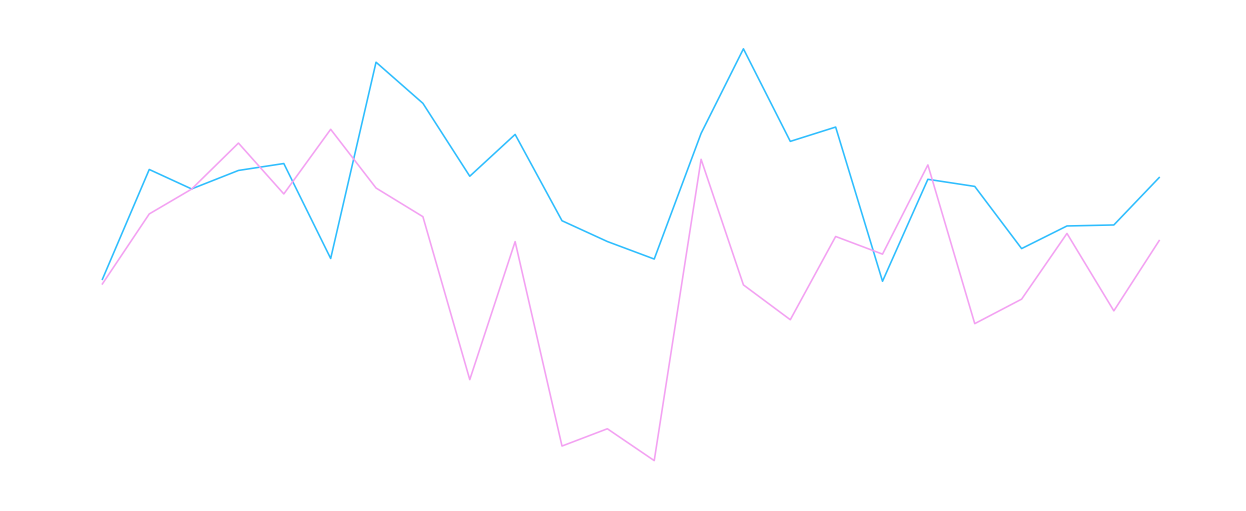

Predicting the carrier United Air Lines Inc.....
METRIC TEMPORAIRE :0.029576764968824634


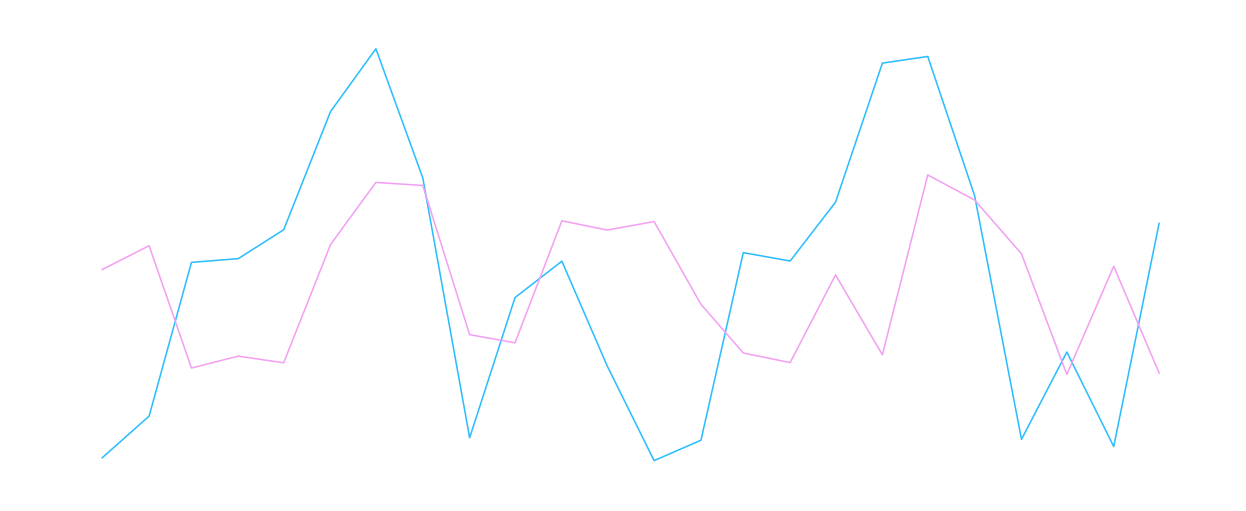

time: 10min 30s (started: 2021-01-14 16:34:19 +00:00)


In [18]:
predictions = LSTM_forecast(dataframe_collection, win_length, batch_size, num_features, model2)

In [19]:
final_pred = pd.concat(predictions)
final_pred.head()

LOAD_FACTOR      PRED
                            DATE                             
Air Wisconsin Airlines Corp 2018-01-01     0.718352  0.755663
                            2018-02-01     0.742246  0.756596
                            2018-03-01     0.795028  0.761873
                            2018-04-01     0.798935  0.764842
                            2018-05-01     0.811830  0.792048

time: 27.2 ms (started: 2021-01-14 16:44:50 +00:00)


In [20]:
final_pred.reset_index(level=0, inplace=True)
final_pred.rename(columns={'level_0': 'UNIQUE_CARRIER_NAME'}, inplace = True)
final_pred.reset_index(level=0, inplace=True)
final_pred.rename(columns={'level_0': 'DATE'}, inplace = True)

time: 6.77 ms (started: 2021-01-14 16:44:50 +00:00)


In [21]:
final_pred.head()

,DATE,UNIQUE_CARRIER_NAME,LOAD_FACTOR,PRED
0,2018-01-01,Air Wisconsin Airlines Corp,0.718352,0.755663
1,2018-02-01,Air Wisconsin Airlines Corp,0.742246,0.756596
2,2018-03-01,Air Wisconsin Airlines Corp,0.795028,0.761873
3,2018-04-01,Air Wisconsin Airlines Corp,0.798935,0.764842
4,2018-05-01,Air Wisconsin Airlines Corp,0.811830,0.792048


time: 20.7 ms (started: 2021-01-14 16:44:50 +00:00)


In [22]:
mean_absolute_error(final_pred['LOAD_FACTOR'], final_pred['PRED'])

0.030851572560778327

time: 4.04 ms (started: 2021-01-14 16:44:50 +00:00)


In [23]:
max(df_tweets_nlp["DATE"])

Timestamp('2019-12-01 00:00:00')

time: 8.91 ms (started: 2021-01-14 16:44:50 +00:00)
